<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_DaNetQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка английского датасета для сравнения

In [2]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://dl.fbaipublicfiles.com/glue/superglue/data/v2/BoolQ.zip" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/BoolQ/
  inflating: data/BoolQ/train.jsonl  
  inflating: data/BoolQ/test.jsonl   
  inflating: data/BoolQ/val.jsonl    



     0K .......... .......... .......... .......... ..........  1% 2.07M 2s
    50K .......... .......... .......... .......... ..........  2% 2.02M 2s
   100K .......... .......... .......... .......... ..........  3% 1.99M 2s
   150K .......... .......... .......... .......... ..........  4% 18.6M 1s
   200K .......... .......... .......... .......... ..........  6% 26.0M 1s
   250K .......... .......... .......... .......... ..........  7% 2.56M 1s
   300K .......... .......... .......... .......... ..........  8% 75.3M 1s
   350K .......... .......... .......... .......... ..........  9% 27.8M 1s
   400K .......... .......... .......... .......... .......... 11% 26.9M 1s
   450K .......... .......... .......... .......... .......... 12% 47.5M 1s
   500K .......... .......... .......... .......... .......... 13% 27.9M 1s
   550K .......... .......... .......... .......... .......... 14% 3.48M 1s
   600K .......... .......... .......... .......... .......... 16%  109M 1s
   650K ...

# Загрузка русскоязычного датасета

In [3]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/DaNetQA" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/DaNetQA/
  inflating: data/DaNetQA/train.jsonl  
   creating: data/__MACOSX/
   creating: data/__MACOSX/DaNetQA/
  inflating: data/__MACOSX/DaNetQA/._train.jsonl  
  inflating: data/DaNetQA/.DS_Store  
  inflating: data/__MACOSX/DaNetQA/._.DS_Store  
  inflating: data/DaNetQA/test.jsonl  
  inflating: data/__MACOSX/DaNetQA/._test.jsonl  
  inflating: data/DaNetQA/val.jsonl  
  inflating: data/__MACOSX/DaNetQA/._val.jsonl  
  inflating: data/__MACOSX/._DaNetQA  



     0K .......... .......... .......... .......... ..........  3%  271K 4s
    50K .......... .......... .......... .......... ..........  7%  274K 4s
   100K .......... .......... .......... .......... .......... 11%  275K 4s
   150K .......... .......... .......... .......... .......... 15% 76.4M 3s
   200K .......... .......... .......... .......... .......... 19%  146M 2s
   250K .......... .......... .......... .......... .......... 23%  185M 2s
   300K .......... .......... .......... .......... .......... 27%  276K 2s
   350K .......... .......... .......... .......... .......... 31% 61.1M 2s
   400K .......... .......... .......... .......... .......... 35% 81.1M 1s
   450K .......... .......... .......... .......... .......... 39%  125M 1s
   500K .......... .......... .......... .......... .......... 43%  111M 1s
   550K .......... .......... .......... .......... .......... 47%  108M 1s
   600K .......... .......... .......... .......... .......... 51%  108M 1s
   650K ...

Fancy way to display content of the dataset directory

In [4]:
%%bash
# add tree package for fancy directory display
apt-get install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (83.3 kB/s)
Selecting previously unselected package tree.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [5]:
# display the content of the folder
!tree

.
└── data
    ├── BoolQ
    │   ├── test.jsonl
    │   ├── train.jsonl
    │   └── val.jsonl
    └── DaNetQA
        ├── test.jsonl
        ├── train.jsonl
        └── val.jsonl

3 directories, 6 files


# Загрузка в pandas

In [6]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""
        return pd.read_json(path_or_buf=self.path, lines=True)

In [7]:
handler = JSONL_handler('data/DaNetQA/train.jsonl')
df = handler.to_pandas()

[Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf?platform=hootsuite) for reference


In [8]:
handler_en = JSONL_handler('data/BoolQ/train.jsonl')
df_en = handler_en.to_pandas()

# Общая информация про train

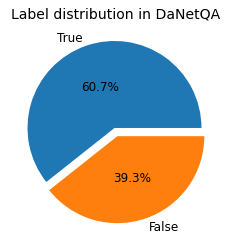

In [ ]:
import matplotlib.pyplot as plt
plt.title('Label distribution in DaNetQA', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

In [ ]:
df['label'].value_counts()

True     1061
False     688
Name: label, dtype: int64

In [ ]:
df_en['label'].value_counts()

True     5874
False    3553
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


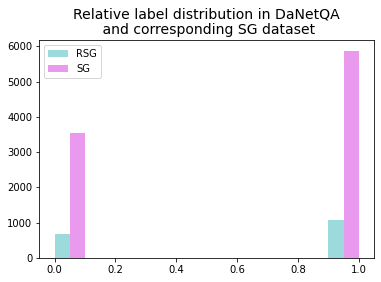

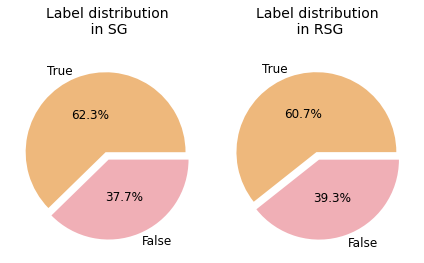

In [ ]:
plt.title('Relative label distribution in DaNetQA\n and corresponding SG dataset', fontsize=14)
plt.hist(x = [df['label'], df_en['label']], color=["#9ddadc", "#e99aee"], label=['RSG','SG'], rwidth = 50) 
plt.legend(loc='best')
plt.show()
print()

plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in SG\n', fontsize=14)
plt.pie(df_en['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df_en['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in RSG\n', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

In [13]:
df.head()

,question,passage,label,idx
0,Вднх - это выставочный центр?,«Вы́ставочный центр» — станция Московского монорельса. Расположена между станциями «Улица Академика Королёва» и «Улица Сергея Эйзенштейна». Находится на территории Останкинского района Северо-Восточного административного округа города Москвы. Переход на станцию ВДНХ Калужско-Рижской линии. Названа в честь Всероссийского выставочного центра — названия ВДНХ с 1992 по 2014 год. 20 ноября 2004 года линия монорельса начала работать в «экскурсионном режиме» и перевезла первых пассажиров .,True,0
1,Вднх - это выставочный центр?,"Вы́ставка достиже́ний наро́дного хозя́йства , в 1959—1991 годах — Вы́ставка достиже́ний наро́дного хозя́йства СССР , в 1992—2014 годах — Всеросси́йский вы́ставочный центр ) — выставочный комплекс в Останкинском районе Северо-Восточного административного округа города Москвы, второй по величине выставочный комплекс в городе. Входит в 50 крупнейших выставочных центров мира. Ежегодно ВДНХ посещают 30 млн гостей. 1 августа 2019 года выставка отпраздновала 80-летний юбилей. Территориально ВДНХ объединена с парком «Останкино» и Главным ботаническим садом , их общая площадь составляет почти 700 га: 240,2 га — площадь ВДНХ, 75,6 га — площадь парка «Останкино», 361 га — площадь ГБС, 9,5 га музейно-выставочный центр «Рабочий и колхозница» и площадь перед аркой Главного входа. На территории Выставки расположено множество шедевров архитектуры — 49 объектов ВДНХ признаны памятниками культурного наследия.",True,1
2,Был ли джиган в black star?,"Вместе с этим треком они выступили на церемонии вручения наград MTV RMA — это был первый выход Джигана на большую сцену. В 2007 году Джиган стал официальным артистом лейбла Black Star Inc., выпустил первый песню и клип «Одноклассница» — совместная работа с Тимати. В марте 2011 года появилась совместная с Юлей Савичевой композиция «Отпусти». Песня поднялась в радиочарте «Tophit» до 8 места и заняла первое место чарта Weekly Audience Choice Top Hit . Количество просмотров клипа на YouTube превысило 17 миллионов.",True,2
3,Xiaomi конкурент apple?,"Xiaomi — китайская компания, основанная в 2010 году и занимающаяся выпуском электроники и бытовой техники, а также разработкой программного обеспечения. Основной продукцией компании являются смартфоны, первый из которых был выпущен в 2011 году. В настоящее время Xiaomi производит широкий ассортимент смартфонов в разных ценовых сегментах и является одним из крупнейших производителей смартфонов в мире. Так, в третьем квартале 2014 года эта компания заняла наивысшее для себя третье место в мире по поставкам смартфонов, набрав 5,2 % в штучном выражении и уступив лишь Samsung и Apple . За весь 2017 год компания заняла по продажам первое место в Китае и второе место в Индии. В данном списке приводятся все смартфоны, когда-либо выпущенные компанией Xiaomi.",True,3
4,Был ли автомат калашникова в вов?,"Отметив некоторые недостатки и в целом удачную конструкцию, специалисты ГАУ не рекомендовали принимать ПП Калашникова на вооружение по технологическим причинам. Заключение гласило: С 1942 года Калашников работал на Центральном научно-исследовательском полигоне стрелкового и миномётного вооружения ГАУ РККА. Здесь в 1944 году он создал опытный образец самозарядного карабина, который, хотя и не вышел в серийное производство, частично послужил прототипом для создания автомата. С 1945 года Михаил Калашников начал разработку автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года. Автомат Калашникова победил в конкурсе 1947 года и был принят на вооружение.",False,4


# Heuristics


In [72]:
import re

Fun fact: если вопрос начинается с "есть", то скорее всего ответ True 

In [83]:
filter = df.question.str.contains('Есть')
df[filter].label.value_counts()

True     148
False     39
Name: label, dtype: int64

Или начинается с (в некоторых случаях просто содержит) "был/была/были" (для наглядности сделано тремя запросами)

In [84]:
filter = df.question.str.contains('Был', regex=True)
df[filter].label.value_counts()

True     439
False    130
Name: label, dtype: int64

In [85]:
filter = df.question.str.contains('была', flags=re.IGNORECASE, regex=True)
df[filter].label.value_counts()

True     122
False     34
Name: label, dtype: int64

In [87]:
filter = df.question.str.contains('были ли', flags=re.IGNORECASE, regex=True)
df[filter].label.value_counts()

True     92
False    22
Name: label, dtype: int64

А вопросы, начинающиеся с "входит ли" чаще всего False

In [68]:
filter = df.question.str.contains('Входит ли')
df[filter].label.value_counts()

False    50
True     37
Name: label, dtype: int64

Очень часто получается так, что если повторяются вопросы, но текстовые фрагменты разные, то ответы все равно одинаковые. То есть тема сильно коррелирует с ответом. 

In [17]:
filter = df.question.str.contains('Были ли в австралии аборигены?')
df[filter]

,question,passage,label,idx
37,Были ли в австралии аборигены?,"2005 — «Предложение». На фоне борьбы колониальных властей с бандой ирландских мигрантов разворачиваются эпизоды геноцида аборигенов и насилия над ними. 2006 — «Десять лодок», из жизни австралийских аборигенов, пользовавшийся успехом в мировом кинопрокате и даже отмеченный специальной премией Каннского фестиваля. Всё актёры фильма были аборигенами и говорили на своём родном языке йолнгу-матха. 2006 — «Джиндабайн», сюжет фильма построен на «заговоре молчания» вокруг убийства аборигенной девушки.",True,37
38,Были ли в австралии аборигены?,"Австралийские аборигены — коренное население Австралии, также иногда называемые «австралийскими бушменами», в языковом и расовом отношениях обособлены от других народов мира. Говорят на австралийских языках, значительная часть — только по-английски и/или на различных вариантах пиджинов. Живут, в основном, в удалённых от городов районах Северной, Северо-Западной, Северо-Восточной и Центральной Австралии, часть — в городах. Австралийская цивилизация является одной из старейших непрерывных культур в мире. В расовом отношении аборигены Австралии образуют отдельную — собственно австралийскую ветвь австралоидной расы.",True,38
39,Были ли в австралии аборигены?,"Австралия была заселена примерно 50 000 лет назад, остатками её коренного населения являются австралийские аборигены. Документированная история |Австралии]] начинается с её открытия европейцами в начале XVI века. Первая документированная высадка европейца на берегах Австралии произошла в 1606 году — им был голландец Виллем Янсзон. Помимо него в течение XVII века ещё 29 голландских мореплавателей исследовали западное и южное побережье континента, дав ему название «Новая Голландия». Первый флот британских кораблей высадился в заливе Ботани в январе 1788 года и основал там колонию для осуждённых.",True,39
40,Были ли в австралии аборигены?,"Доисторическая эпоха Австралии — временной отрезок с момента прибытия в Австралию первых людей и до их первой встречи с европейцами в 1606 году, когда начинается письменная история Австралии. По различным оценкам, праистория Австралии продолжалась от 40 до 70 тысяч лет. Первые грацильные сапиенсы переправились в Сахул там, где сейчас находится Арафурское море и архипелаг Ару. По мнению антропологов, человек разумный прибыл в Австралию не позднее 40 тысяч лет назад. К этому времени относятся следы обитания человека, обнаруженные в верховьях реки Суон в Западной Австралии.",True,40
41,Были ли в австралии аборигены?,"О культурном и технологическом обмене между макасарами и коренным австралийским населением свидетельствуют ряд мотивов в аборигенном искусстве, появление таких предметов, как каноэ-долблёнки, табак и трубки для курения, наличие отдельных макассарских слов в аборигенных языках . Большинство историков считает, что тамаринд в Австралию завезли макасары. Доказано также наличие потомков малайской субрасы среди австралийских аборигенов в результате смешанных браков и миграций. Через Индонезию редкие сведения о существовании австралийского континента доходили даже до Китая. На карте мира 1603 года, составленной Маттео Риччи, основателем иезуитской миссии в Пекине, на месте, где должна находиться Австралия, написано: «Никто никогда не бывал на этой южной земле, поэтому мы ничего не знаем о ней».",True,41
42,Были ли в австралии аборигены?,"Описывая культуру австралийских аборигенов в своей Бойеровской лекции в 1999 г., историк и антрополог Инга Клендиннен говорила: Они […] разработали настолько сложную систему представлений о мире, что в ней находится место для любого существа, для любого растения. Они путешествовали налегке, но сами по себе были ходячими атласами, ходячими энциклопедиями естественной истории. […] Подробные наблюдения за природой возвышались до уровня драмы путём создания множественных, многоуровневых сказаний, которые делали легко запоминаемыми сложные отношения между наблюдаемыми феноменами.Политическая власть находилась в руках 

In [21]:
filter = df.question.str.contains('Были ли викинги в')
df[filter]

,question,passage,label,idx
57,Были ли викинги в ирландии?,"Королевство Дублин — средневековое королевство, образованное норвежскими викингами в Ирландии. Территория королевства в основном совпадает с территорией, занимаемой историческим графством Дублин. Столица королевства находилась в городе Дублин. Викинги нападали на Ирландию начиная с 795 года. В 837 году норвежский викинг Тургейс вторгся на север Ирландии и, воспользовавшись междоусобицами, покорил Ульстер, а также захватил Армаг, важнейший религиозный центр Ирландии.",True,57
58,Были ли викинги в ирландии?,"Отметим, что в старофранцузском языке слова «норманн» и «викинг» — не вполне являются синонимами. Норманнами франки называли всех «северян», в том числе славян, русов, финнов и т. д., а не только скандинавов. В Германии X—XI веков викингов называли аскеманнами — «ясеневыми людьми», то есть «плывущими на ясенях» , так как верхняя обшивка и мачты военных судов викингов выполнялись из этого дерева. Англосаксы называли их данами, независимо от того, приплыли ли они именно из Дании, или из Норвегии, Швеции, Исландии, Финляндии, Руси. В Ирландии их всех различали по цвету волос и называли финнгаллами, то есть «светлыми чужеземцами» или же дубгаллами — «тёмными чужеземцами» .",True,58
59,Были ли викинги в исландии?,"В эпоху викингов скандинавы-викинги путешествовали от Ирландии и до Руси, занимаясь торговлей, охотой и грабежом. Около 860 года викинги открыли остров, назвав его «Исландией» , и основали там ряд колоний. Совершая частые плавания на Запад, викинги, как ныне считается, первыми из европейцев посетили Америку, кроме того, в эпоху викингов произошел также первый генетический контакт между европейцами и жителями Северной Америки. Около 900 года из Норвегии отправился корабль под командой Гуннбьёрна. Он сбился с курса, и викинги увидели остров .",True,59
60,Были ли викинги в исландии?,"История Исландии хорошо известна благодаря большому количеству саг, дошедших до нас. Обычная исландская сага — это описание жизни одного человека на протяжении многих лет, с подробным описанием важнейших событий. Население Исландии было небольшим, а потому и её история — это история меньших или больших частных дел и конфликтов. Древние исландцы были искусными мореходами и викингами. Если верить «Саге о Гренландцах», сын Эрика Рыжего Лейф Счастливый в 1000 году достиг берегов Америки и попытался основать колонию в «Виноградной стране» — Винланде .",True,60


In [24]:
filter = df.question.str.contains('Были ли у цезаря враги?')
df[filter]

,question,passage,label,idx
76,Были ли у цезаря враги?,"В течение четырёх лет сторонники сената, сгруппировавшиеся вокруг Помпея, были разбиты Цезарем в Италии, Испании , Греции и Африке, также им были разбиты войска правителей Египта и Понта. Придерживался политики милосердия, но в то же время казнил ряд своих ключевых оппонентов. Добившись полной победы над противниками, сконцентрировал в своих руках власть консула и чрезвычайные полномочия диктатора , провёл ряд реформ во всех сферах жизни общества. При жизни Цезаря началось его обожествление, почётный титул полководца-победителя «император» стал частью его имени, однако он отказывался от власти древних римских царей. После убийства Цезаря группой сенаторов во главе с Марком Юнием Брутом внучатый племянник Цезаря Гай Октавий принял его имя и получил большую часть наследства по завещанию, став впоследствии первым императором.",True,76
77,Были ли у цезаря враги?,"Гражда́нская война́ в Дре́внем Ри́ме продолжалась с 49 по 45 года до н. э. и была одним из последних крупных внутренних конфликтов в Римской республике перед установлением империи. Она началась со столкновений Гая Юлия Цезаря , его политических сторонников и верных ему легионов против оптиматов, которых возглавлял Гней Помпей Великий. Боевые действия длились четыре года на территории многих римских провинций: Италии, Африки, Иллирии, Египта, Испании, Ахеи. Победу одержал Цезарь, что позволило получить ему статус пожизненного диктатора. Несмотря на то, что через год он был убит, эти события впоследствии привели к падению республиканского строя и установлению монархической власти Октавиана Августа, приёмного сына Цезаря.",True,77
78,Были ли у цезаря враги?,"Они не получили ожидаемой поддержки; в день похорон Цезаря народ окончательно встал на сторону его «партии», которую возглавлял Марк Антоний. Летом 44 года до н. э. заговорщики разъехались по провинциям. Постепенно разгорелась гражданская война, в которой они к концу 42 года до н. э. потерпели поражение и погибли один за другим. Убийство Цезаря изображено во множестве произведений живописи и литературы. Римская республика в 50-е годы до н. э. переживала глубокий политический кризис, который позже перерос в гражданскую войну.",True,78
79,Были ли у цезаря враги?,"Убийство Гая Юлия Цезаря произошло 15 марта 44 года до н. э. в Риме. Выдающийся полководец Гай Юлий Цезарь в ходе гражданской войны 49—45 годов до н. э. разгромил своих политических врагов и установил единоличную власть над Римской державой. Группа сенаторов во главе с Гаем Кассием Лонгином и Марком Юнием Брутом организовала заговор, чтобы убить Цезаря и восстановить Республику. На заседании сената в иды марта заговорщики набросились на диктатора с кинжалами и нанесли ему 23 раны, от которых он умер на месте. После этого убийцы заняли Капитолий.",True,79


In [80]:
df.iloc[250:300]

,question,passage,label,idx
250,Есть ли в домашнем квасе алкоголь?,"Квас — традиционный славянский и балтский кислый напиток, который готовят на основе брожения из муки и солода или из сухого ржаного хлеба, иногда с добавлением пахучих трав, мёда, пчелиных сотов; также готовится из свёклы, фруктов, ягод. Квас используется не только как напиток, но и является основой для классических холодных похлёбок русской кухни . До XII века квас на Руси был крепче и гуще современного пива. Квас считался алкогольным напитком, и аналогом слова «пьяница» на языке того времени было слово «квасник» . С XII века стали различать квас как кислый слабоалкогольный напиток и квас как сильно опьяняющий напиток.",True,250
251,Вредны ли дрожжи в хлебе?,"Дрожжефобия, дрожжи-убийцы — распространённая в России с начала 2000-х годов теория заговора о вреде для здоровья дрожжей, являющаяся частью движения Нью-Эйдж и опровергаемая многими экспертами. Первые упоминания дрожжефобии можно найти в книге американских пропагандистов сыроедения Юджина и Молли Грисволд Кристиан, вышедшей в 1904 году, где авторы пишут о процессе подъёма теста в результате «инфицирования» дрожжами и сравнивают дрожжи с червями. Дрожжефобия получила распространение в России в начале 2000-х годов. Вероятно, первый текст на эту тему появился в 2000 году в газете «АиФ — здоровье»: это была статья журналиста В. Волкова «Дрожжи-киллеры», в которой со ссылкой на «американских учёных» утверждалось, что дрожжи вызывают рак. Теорию заговора поддерживают православные фундаменталисты, считающие, что «термофильные дрожжи» выращиваются на костях людей и животных и что они изобретены «гитлеровцами» как биологическое оружие для уничтожения русского народа.",False,251
252,Вреден ли дуст для растений?,"Можно ожидать, что использование широко распространённых фильтрующих СИЗОД в сочетании с «заменой фильтров по появлении запаха под маской» приведёт к чрезмерному воздействию гексахлорана на, по крайней мере, часть работников — из-за запоздалой замены противогазных фильтров. Для защиты от этого вещества следует использовать значительно более эффективные изменение технологии и средства коллективной защиты. ГХЦГ и его изомеры представляет большую угрозу животному и растительному миру. Обладает ярко выраженным кумулятивным свойством. Накапливается в организмах животных , в растениях .",True,252
253,Передается ли еврейство по отцу?,"Негалахические евреи — граждане Израиля еврейского происхождения, не признаваемые государством как евреи на основе религиозного закона Галаха. В Израиле, в соответствии с Галахой, принадлежность к еврейству определяется по матери. Начиная с 2010 года, любой, кто иммигрировал в Израиль после 1990 года и желает вступить в брак или развестись по еврейской традиции, должен пройти «тест на еврейство» в еврейском религиозном суде. Во многих других государствах молодые люди, имеющие родителей разных национальностей, имеют возможность выбрать национальность любого из родителей исходя из личных предпочтений. Вследствие этого множество граждан других государств, считающих себя или числящихся по личным документам евреями в странах исхода, в Израиле таковыми не считаются.",False,253
254,Передается ли еврейство по отцу?,"Политическое объяснение: в ходе войн евреев с римлянами немало еврейских женщин были изнасилованы неевреями, и закон был изменён таким образом, чтобы включить их детей в еврейский народ. Демографическое объяснение: многие еврейские мужчины погибали в войнах, поэтому пришлось принять в нацию тех детей, которые были рождены от нееврейских мужчин. Юридическое объяснение: римское право придаёт особое значение законности брака. Дети, родившиеся у отцов, имевших римское гражданство, но не заключавших законного брака, получали происхождение матери и не получали гражданских прав отца. Тем самым, еврейский обычай является зеркальным отображением этого закона.",False,254
255,Едят ли в греции греческий салат?,"Гре́ческий сала́т — греческий салат из помидоров, огурцов, феты, шалота и масли

# True (ошибки и странности разметки)

In [ ]:
df_true = df[(df['label'] == True)]
df_true.reset_index
df_true.iloc[50:60]

,question,passage,label,idx
59,Были ли викинги в исландии?,"В эпоху викингов скандинавы-викинги путешествовали от Ирландии и до Руси, занимаясь торговлей, охотой и грабежом. Около 860 года викинги открыли остров, назвав его «Исландией» , и основали там ряд колоний. Совершая частые плавания на Запад, викинги, как ныне считается, первыми из европейцев посетили Америку, кроме того, в эпоху викингов произошел также первый генетический контакт между европейцами и жителями Северной Америки. Около 900 года из Норвегии отправился корабль под командой Гуннбьёрна. Он сбился с курса, и викинги увидели остров .",True,59
60,Были ли викинги в исландии?,"История Исландии хорошо известна благодаря большому количеству саг, дошедших до нас. Обычная исландская сага — это описание жизни одного человека на протяжении многих лет, с подробным описанием важнейших событий. Население Исландии было небольшим, а потому и её история — это история меньших или больших частных дел и конфликтов. Древние исландцы были искусными мореходами и викингами. Если верить «Саге о Гренландцах», сын Эрика Рыжего Лейф Счастливый в 1000 году достиг берегов Америки и попытался основать колонию в «Виноградной стране» — Винланде .",True,60
63,Были ли сестринские авиакомпании у s7?,"Переломным для «Сибири» стал 2005 год: на базе авиакомпании и её структурных подразделений была создана группа компаний «S7 Group», проведён ребрендинг и смена раскраски фюзеляжей самолётов. 15 ноября 2010 года S7 Airlines вместе со своей сестринской авиакомпанией Глобус вступила в международный авиационный альянс Oneworld, что позволило авиакомпании продавать билеты по код-шеринговому партнёрству с ведущими авиакомпаниями мира. В 2011 году государство вновь трижды выставляло свой пакет акций S7 Airlines на аукционы, но все они не состоялись в связи с отсутствием претендентов на покупку. Эксперты объясняли неудачи в приватизации пакета тем, что для портфельных инвесторов он не интересен вследствие высокой стартовой цены , а для стратегических — из-за размера пакета, не дающего права реального влияния на управление авиакомпанией. В мае 2013 года S7 Group одержало победу в тендере по покупке госпакета акций авиакомпании «Сибирь», предложив за 25,5 % акций перевозчика 1 млрд 133 млн руб.",True,63
64,Были ли немцы в крыму?,"Крымские немцы — этнические немцы, проживавшие в бывшей Таврической губернии. Первые немецкие поселения появились в начале XIX века. В августе 1941 года в связи с началом Великой Отечественной войны все крымские немцы в количестве 52 тыс. человек были депортированы из Крыма. Немцы появились в Крыму в 1805 году.",True,64
65,Были ли немцы в крыму?,"По итогам переписи 1897 года в Крыму жили почти 32 тысячи немцев — 5,8% от тогдашнего населения Крыма. В апреле 1918 года Крым был оккупирован кайзеровскими войсками 15-й ландверной дивизии под командованием генерала фон Коша. 5 мая Р. фон Кош назначает военным губернатором Крыма генерал-майора барона Вильгельма фон Эглофштейна, командира 4-й Баварской кавалерийской дивизии. Германское командование решило сделать ставку на местных немцев-колонистов. В Крым прибыл Фридрих фон Линдеквист, бывший германский министр колоний , развернувший вместе с протестантским пастором И. Винклером из Бессарабии среди них активную деятельность.",True,65
66,Были ли у александра македонского дети?,"Геракл — сын македонского царя Александра Македонского от его любовницы Барсины. Дед Геракла, Артабаз, правил сатрапией в Малой Азии. Мать Геракла, Барсина, происходила из знатного персидского рода. Её выдали замуж за грека Ментора, ставшего командующим персидскими войсками на Западе, а после его смерти она повторно вышла замуж за брата покойного мужа, Мемнона. Мемнон воевал с Александром Великим, когда тот вторгся в Азию в 334 году до н. э., а чтобы он не перешёл на сторону македонского царя, его жену Барсину держали при дворе персидского царя Дария III.",True,66
67,Были ли немцы в ялте?,"В 1937-ом году, после окончания установления советской власти в Крыму, храм бы

In [ ]:
#ошибки
df.iloc[[24, 27, 40, 55]]

,question,passage,label,idx
24,Был на зоне бунт в 1990 году?,"Восстание в тюрьме Спач — восстание заключённых албанской тюрьмы Спач 21-23 мая 1973 года. Тюремный бунт, спровоцированный жестокостью порядков содержания, перерос в политический протест под антикоммунистическими лозунгами. Около двух суток тюрьма контролировалась заключёнными и была провозглашена освобождённой территорией Албании. Выступление подавлено силами Сигурими и полиции при армейской поддержке. Лидеры казнены или получили дополнительные сроки заключения.",True,24
27,Были ли у андрея болконского прототип?,"Андре́й Никола́евич Болко́нский — один из центральных персонажей романа Л. Н. Толстого «Война и мир». Сын князя Николая Андреевича Болконского. Не имеет точных прототипов из реальной жизни. Некоторые элементы военной карьеры князя Андрея могли быть списаны с биографий Н. А. Тучкова, Ф. И. Тизенгаузена и Петра Михайловича Волконского. Сюжет помолвки Наташи и Андрея частично срисован с неудачной женитьбы Т. А. Кузьминской и старшего брата писателя — С. Н. Толстого.",True,27
40,Были ли в австралии аборигены?,"Доисторическая эпоха Австралии — временной отрезок с момента прибытия в Австралию первых людей и до их первой встречи с европейцами в 1606 году, когда начинается письменная история Австралии. По различным оценкам, праистория Австралии продолжалась от 40 до 70 тысяч лет. Первые грацильные сапиенсы переправились в Сахул там, где сейчас находится Арафурское море и архипелаг Ару. По мнению антропологов, человек разумный прибыл в Австралию не позднее 40 тысяч лет назад. К этому времени относятся следы обитания человека, обнаруженные в верховьях реки Суон в Западной Австралии.",True,40
55,Были ли олеся и ее бабка колдуньями?,"Через месяц Ивану Тимофеевичу приходит время возвращаться в город. Он предлагает Олесе выйти за него и уехать вместе, но Олеся отказывается, объясняя это тем, что не может венчаться в церкви, так как она колдунья, а значит, принадлежит дьяволу. На следующий день молодой барин уезжает в соседнее село. Вернувшись после обеда, он встречает приказчика Никиту Назарыча Мищенку, который рассказывает, что у церкви крестьяне поймали и избили ведьму. Она выскользнула из толпы и убежала в лес, крича проклятья.",True,55


In [ ]:
#странности
df.iloc[[25, 28, 37, 52, 53, 56, 63]]

,question,passage,label,idx
25,Был ли бурито в группе бандерос?,"Игорь Юрьевич Бурнышев — российский автор-исполнитель, солист группы Burito, бывший участник группы «Банд’Эрос», режиссёр-постановщик, телеведущий, клипмейкер, актёр, диджей. В 1994 году окончил школу № 49 в Ижевске и поступил в Удмуртское училище культуры на специальность «РТП». До 1996 года параллельно с учёбой работал на радиостанции «Радуга» ведущим прямого эфира. В училище окончил два курса, после чего переехал в Москву. В 1996 году поступил в Московский государственный университет культуры и искусств на специальность «Режиссёр театрализованных представлений и шоу-программ» на курс Владимира Соломоновича Маганета, где обучался в период с 1996 по 2001 годы.",True,25
28,Были ли гладиаторы в древней италии?,"Гладиа́тор — боец в Древнем Риме, который сражался с подобными себе на забаву публике на специальных аренах за право быть освобожденным от рабства. Основной причиной возникновения гладиаторских игр являлся заимствованный у этрусков погребальный обряд, подобный древней борьбе сумо в Японии. Потенциальные жертвы человеческих жертвоприношений — не только рабы, но и свободные — должны были с мечами в руках сражаться около могилы, и, таким образом, погибал слабый, а сильный оставался в живых, вызывая восторг присутствующих. Многие рабы добровольно старались попасть в школу гладиаторов, так как сражаясь на арене и завоевывая любовь публики, они могли завоевать себе свободу. Нередко рабы затевали драки между собой, чтобы таким образом показать свою силу перед хозяевами.",True,28
37,Были ли в австралии аборигены?,"2005 — «Предложение». На фоне борьбы колониальных властей с бандой ирландских мигрантов разворачиваются эпизоды геноцида аборигенов и насилия над ними. 2006 — «Десять лодок», из жизни австралийских аборигенов, пользовавшийся успехом в мировом кинопрокате и даже отмеченный специальной премией Каннского фестиваля. Всё актёры фильма были аборигенами и говорили на своём родном языке йолнгу-матха. 2006 — «Джиндабайн», сюжет фильма построен на «заговоре молчания» вокруг убийства аборигенной девушки.",True,37
52,Были ли у сократа дети?,"От неё он имел троих сыновей: Лампрокла, Софрониска и Менексена. В Греции существовал обычай называть первенца в честь более известного деда. Отца Сократа звали Софрониск , что позволяет предположить, что Лампрокл был назван в честь отца Ксантиппы, и положение её семьи в афинском обществе было более прочное и выдающееся, чем семьи Сократа. На хорошее происхождение Ксантиппы указывает и её имя, восходящее к греческим корням ξανθός «xanthos» и ἵππος «hippos» . Корень ἵππος часто встречается в греческих именах и зачастую указывает на аристократическое происхождение.",True,52
53,Были ли у синявской дети?,"М. Магомаева в Баку, после чего он был похоронен по мусульманским канонам на Аллее почётного захоронения рядом со своим дедом — известным советским композитором, дирижёром Муслимом Магометовичем Магомаевым. Проститься с Магомаевым пришли тысячи людей. Гроб с телом покойного вынесли под звуки написанной и исполненной им песни «Азербайджан». В траурной процессии принимали участие президент страны Ильхам Алиев, вдова певца Тамара Синявская и его дочь Марина, прилетевшая из США. Родители: Магомет Магомаев , Айшет Магомаева .",True,53
56,Были ли немцы в ельце?,"Еле́цкая наступательная опера́ция — фронтовая наступательная операция РККА в ходе Великой Отечественной войны, предпринятая в период с 6 по 16 декабря 1941 года войсками правого крыла Юго-Западного фронта в ходе контрнаступления под Москвой. Цель операции — окружить и уничтожить группировку противника в районе города Ельца, в дальнейшем нанести удар в тыл войскам 2-й немецкой танковой армии. В результате Елецкой операции войска правого крыла Юго-Западного фронта, продвинувшись на 80-100 км, ликвидировали елецкий выступ, окружили и уничтожили более 2 дивизий, нанесли серьёзное поражение 2-й немецкой армии. Они отвлекли на себя часть сил 2-й ТА, оказав этим существенную помощь войск

# False

In [ ]:
df_false = df[(df['label'] != True)]
df_false.head()

,question,passage,label,idx
4,Был ли автомат калашникова в вов?,"Отметив некоторые недостатки и в целом удачную конструкцию, специалисты ГАУ не рекомендовали принимать ПП Калашникова на вооружение по технологическим причинам. Заключение гласило: С 1942 года Калашников работал на Центральном научно-исследовательском полигоне стрелкового и миномётного вооружения ГАУ РККА. Здесь в 1944 году он создал опытный образец самозарядного карабина, который, хотя и не вышел в серийное производство, частично послужил прототипом для создания автомата. С 1945 года Михаил Калашников начал разработку автоматического оружия под промежуточный патрон 7,62×39 образца 1943 года. Автомат Калашникова победил в конкурсе 1947 года и был принят на вооружение.",False,4
13,Был ли ссср участником бернской конвенции?,"Бе́рнская конве́нция по охра́не литерату́рных и худо́жественных произведе́ний — международное соглашение в области авторского права, принятое в Берне, Швейцария в 1886 году. Является ключевым международным соглашением в этой области. В настоящее время администрируется Всемирной организацией интеллектуальной собственности. Бернская конвенция была принята 9 сентября 1886 года в Берне, Швейцария. Первыми участниками конвенции были: Бельгия, Германия, Франция, Испания, Великобритания, Тунис и Швейцария.",False,13
14,Был ли ссср участником бернской конвенции?,"Российская империя планировала присоединиться к Бернской конвенции в начале XX века, но, согласно Стояновичу, это не было реализовано из-за начала Первой мировой войны. После Октябрьской революции Советский Союз изначально вообще не имел международных обязательств в сфере авторского права. Во время проведения новой экономической политики советское правительство неудачно пыталось заключить новые двусторонние соглашения с Великобританией, Германией и Италией. После этих провалившихся попыток СССР сохранял изоляционистскую политику в сфере авторского права до конца 1960-х годов. Первое двустороннее соглашение с Венгрией вступило в силу 17 ноября 1967 года, а 8 октября 1971 года последовало двустороннее соглашение с Болгарией.",False,14
16,Правда ли что слоны боятся мышей?,"Слоновые хорошо слышат в области низких частот, вплоть до инфразвука, но наибольшая чувствительность их слуха на частоте около 1 кГц. Слоны обладают музыкальным слухом и музыкальной памятью, способны различать мелодии из трёх нот, музыку на скрипке и низкие звуки баса и рога предпочитают высоким флейтовым мелодиям. Также, вопреки распространённому заблуждению, слоны абсолютно не боятся мышей и других мелких животных.Слоны — социальные животные. Обычно они образуют группы из самок и детёнышей, возглавляемых старой и опытной самкой. Самцы образуют отдельные стада.",False,16
21,Был ли бриллиант на титанике?,"5 апреля 2012 года, в год 100-летия легендарной катастрофы и 15-летия выпуска фильма состоялась премьера этого фильма в формате 3D и IMAX 3D. В 2017 году фильм был выбран для сохранения в Национальном реестре фильмов США. В 1996 году охотник за сокровищами Брок Лаветт и его команда на научно-исследовательском судне «Академик Мстислав Келдыш» на глубоководных батискафах «Мир-1» и «Мир-2» погружаются на дно Атлантического океана, где покоятся останки лайнера «Титаник», затонувшего 15 апреля 1912 года. Они обнаруживают сейф, в котором, по предположению Лаветта, должно находиться ожерелье с голубым бриллиантом, известное как «Сердце океана». В начале XX века один питтсбургский Ротшильд Натан Хокли приобрёл его для своего сына-промышленника Каледона, который подарил ожерелье в качестве свадебного подарка своей невесте — англичанке Розе Дьюитт Бьюкейтер, вместе с которой он плыл на «Титанике» в США, где они должны были пожениться.",False,21


# Feature analysis

In [ ]:
!pip install eli5
import numpy as np
import eli5
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

     |████████████████████████████████| 112kB 5.3MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
handler = JSONL_handler('data/DaNetQA/val.jsonl')
df1 = handler.to_pandas()
 
data = pd.DataFrame({'passage': df.passage, 'label': df.label})
data_val = pd.DataFrame({'passage': df1.passage, 'label': df1.label})

data['meta'] = df.passage + ' ' + df.question
data_val['meta'] = df1.passage + ' ' + df1.question
 
data['q'] = df.question
data_val['q'] = df1.question

Только вопросы с теми же параметрами, что в baseline. Из-за специальной предобработки мои результаты хуже

In [ ]:
steps = [('tfidf', TfidfVectorizer(analyzer='word', max_features=10000)),
         ('logreg', LogisticRegression())]

X_train = data.q
y_train = data.label
X_test = data_val.q
y_test = data_val.label
 
pipeline = Pipeline(steps)
 
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
 
print("Accuracy: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.5651644336175395
              precision    recall  f1-score   support

       False       0.74      0.20      0.31       409
        True       0.54      0.93      0.68       412

    accuracy                           0.57       821
   macro avg       0.64      0.56      0.50       821
weighted avg       0.64      0.57      0.50       821



Если с теми же параметрами, но на всех данных, то еще немного хуже

In [ ]:
steps = [('tfidf', TfidfVectorizer(analyzer='word', max_features=10000)),
         ('logreg', LogisticRegression())]

X_train = data.meta
y_train = data.label
X_test = data_val.meta
y_test = data_val.label
 
pipeline = Pipeline(steps)
 
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
 
print("Accuracy: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.5578562728380024
              precision    recall  f1-score   support

       False       0.79      0.15      0.25       409
        True       0.53      0.96      0.69       412

    accuracy                           0.56       821
   macro avg       0.66      0.56      0.47       821
weighted avg       0.66      0.56      0.47       821



Та же история, но с fine-tuning'ом параметров. Результат даже превосходит baseline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
 
steps = [('tfidf', TfidfVectorizer(analyzer='word', max_features=10000)),
         ('logreg', LogisticRegression(class_weight='balanced', n_jobs=-1, max_iter=500))]
 
parameters = {'logreg__C': np.logspace(-10, 8, 30)}
 
X_train = data.q
y_train = data.label
X_test = data_val.q
y_test = data_val.label
 
pipeline = Pipeline(steps)
 
search = GridSearchCV(pipeline, cv=5, param_grid = parameters, scoring='accuracy')
 
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
 
print("Accuracy: {}".format(search.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(search.best_params_))

Accuracy: 0.6175395858708892
              precision    recall  f1-score   support

       False       0.74      0.36      0.49       409
        True       0.58      0.87      0.70       412

    accuracy                           0.62       821
   macro avg       0.66      0.62      0.59       821
weighted avg       0.66      0.62      0.59       821

Tuned Model Parameters: {'logreg__C': 0.20433597178569396}


Если без вопроса, то еще немного хуже

In [ ]:
steps = [('tfidf', TfidfVectorizer(analyzer='word', max_features=10000)),
         ('logreg', LogisticRegression())]

X_train = data.passage
y_train = data.label
X_test = data_val.passage
y_test = data_val.label
 
pipeline = Pipeline(steps)
 
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
 
print("Accuracy: {}".format(pipeline.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.5493300852618758
              precision    recall  f1-score   support

       False       0.75      0.14      0.24       409
        True       0.53      0.95      0.68       412

    accuracy                           0.55       821
   macro avg       0.64      0.55      0.46       821
weighted avg       0.64      0.55      0.46       821



Другой способ векторизации только вопросы

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
 
steps = [('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range= (3,3))),
         ('logreg', LogisticRegression(class_weight='balanced', n_jobs=-1, max_iter=500))]
 
parameters = {'logreg__C': np.logspace(-5, 8, 15)}
 
X_train = data.q
y_train = data.label
X_test = data_val.q
y_test = data_val.label
 
pipeline = Pipeline(steps)
 
search = GridSearchCV(pipeline, cv=5, param_grid = parameters, scoring='accuracy')
 
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
 
print("Accuracy: {}".format(search.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(search.best_params_))

Accuracy: 0.6370280146163215
              precision    recall  f1-score   support

       False       0.69      0.50      0.58       409
        True       0.61      0.77      0.68       412

    accuracy                           0.64       821
   macro avg       0.65      0.64      0.63       821
weighted avg       0.65      0.64      0.63       821

Tuned Model Parameters: {'logreg__C': 1e-05}


Все данные 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
 
steps = [('tfidf', TfidfVectorizer(analyzer='char_wb')),
         ('logreg', LogisticRegression(class_weight='balanced', n_jobs=-1, max_iter=500))]
 
parameters = {'logreg__C': np.logspace(-10, 8, 30),
              'tfidf__ngram_range' : [(1,1), (2,2), (3,3), (4,4), (5,5), (1,5), (2,6)]}
 
X_train = data.meta
y_train = data.label
X_test = data_val.meta
y_test = data_val.label
 
pipeline = Pipeline(steps)
 
search = GridSearchCV(pipeline, cv=5, param_grid = parameters, scoring='accuracy')
 
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
 
print("Accuracy: {}".format(search.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(search.best_params_))

Accuracy: 0.5712545676004872
              precision    recall  f1-score   support

       False       0.65      0.30      0.41       409
        True       0.55      0.84      0.66       412

    accuracy                           0.57       821
   macro avg       0.60      0.57      0.54       821
weighted avg       0.60      0.57      0.54       821

Tuned Model Parameters: {'logreg__C': 3.5622478902624515, 'tfidf__ngram_range': (1, 5)}


In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
vectorizer = TfidfVectorizer()
clf = SGDClassifier(loss="log", n_jobs=-1, alpha=0.0001, class_weight='balanced', random_state=42)

X_train = vectorizer.fit_transform(data.passage)
X_test = vectorizer.transform(data_val.passage)
y_train = data.label
y_test = data_val.label

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
 
# Compute and print metrics
print("Accuracy: {}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.5602923264311814
              precision    recall  f1-score   support

       False       0.63      0.28      0.39       409
        True       0.54      0.84      0.66       412

    accuracy                           0.56       821
   macro avg       0.59      0.56      0.52       821
weighted avg       0.59      0.56      0.52       821



In [ ]:
eli5.show_weights(clf, top=45, feature_names = vectorizer.get_feature_names())

Weight?,Feature
+2.353,человек
+2.064,истории
+2.032,людей
+1.874,ссср
+1.871,17
+1.805,хвост
+1.770,войны
+1.664,до
+1.631,великой
+1.577,россии


# Step-by-step recreation with the help of the OG code

In [ ]:
%%bash
wget -q --show-progress "https://russiansuperglue.com/tasks/tf_idf" -O temp.zip
unzip temp.zip -d data
rm temp.zip

In [ ]:
import codecs
import json
from sklearn.linear_model import LogisticRegression
import pickle
import joblib

vect = joblib.load("data/tfidf.pkl")
#  добавила еще и passage (надо посмотреть, что там происходит)
def build_feature_DaNetQA(row):
    # passage = str(row["passage"]).strip()
    question = str(row["question"]).strip()
    label = row.get("label")
    # res = f"{passage} {question}"
    res = question
    return res, label


def build_features_DaNetQA(path, vect):
    with codecs.open(path, encoding='utf-8-sig') as reader:
        lines = reader.read().split("\n")
        lines = list(map(json.loads, filter(None, lines)))
    res = list(map(build_feature_DaNetQA, lines))
    texts = list(map(lambda x: x[0], res))
    labels = list(map(lambda x: x[1], res))
    ids = [x["idx"] for x in lines]
    return (vect.transform(texts), labels), ids


def fit_DaNetQA(train, labels):
    clf = LogisticRegression()
    return clf.fit(train, labels)


def eval_DaNetQA(train_path, val_path, test_path, vect):
    train, _ = build_features_DaNetQA(train_path, vect)
    val, _ = build_features_DaNetQA(val_path, vect)
    test, ids = build_features_DaNetQA(test_path, vect)
    clf = fit_DaNetQA(*train)
    try:
        test_score = clf.score(*test)
    except ValueError:
        test_score = None
    test_pred = clf.predict(test[0])
    return clf, {
        "train": clf.score(*train),
        "val": clf.score(*val),
        "test": test_score,
        "test_pred": [{"idx": idx, "label": str(label).lower()} for idx, label in zip(ids, test_pred)]
    }

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
train_path = "data/DaNetQA/train.jsonl"
val_path = "data/DaNetQA/val.jsonl"
test_path = "data/DaNetQA/test.jsonl"

_, DaNetQA_scores = eval_DaNetQA(train_path, val_path, test_path, vect)

In [ ]:
DaNetQA_scores["train"], DaNetQA_scores["val"]

(0.8010291595197255, 0.5907429963459196)

In [ ]:
train, _ = build_features_DaNetQA(train_path, vect)
val, _ = build_features_DaNetQA(val_path, vect)

In [ ]:
clf = fit_DaNetQA(*train)
y_din = clf.predict(val[0])
print("Accuracy: {}".format(clf.score(*val)))
print(classification_report(val[1], y_din))

Accuracy: 0.5907429963459196
              precision    recall  f1-score   support

       False       0.81      0.23      0.36       409
        True       0.55      0.95      0.70       412

    accuracy                           0.59       821
   macro avg       0.68      0.59      0.53       821
weighted avg       0.68      0.59      0.53       821



# Preprocessing


In [ ]:
!pip install pymorphy2 
import pymorphy2
import re
from pymorphy2 import MorphAnalyzer
from functools import lru_cache
import nltk

m = MorphAnalyzer()

rg = re.compile("[А-Яа-яA-z]+")

def words_only(text, rg=rg):
    try:
        return rg.findall(text.lower())
    except:
        return []

@lru_cache(maxsize=128)
def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)  
    return lemmas

def lemmas(data, column):
  new_words = []
  for i in range(len(data[column])):
    nw = clean_text(data[column][i])
    nw = ' '.join(nw)
    new_words.append(nw)
  data[column] = new_words
  return data

In [ ]:
handler = JSONL_handler('data/DaNetQA/val.jsonl')
df1 = handler.to_pandas()

df = lemmas(df, 'passage')
df1 = lemmas(df, 'passage')

data = pd.DataFrame({'passage': df.passage, 'label': df.label})
data_val = pd.DataFrame({'passage': df1.passage, 'label': df1.label})

data['meta'] = df.passage + ' ' + df.question
data_val['meta'] = df1.passage + ' ' + df1.question
 
data['q'] = df.question
data_val['q'] = df1.question

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
vectorizer = TfidfVectorizer()
clf = SGDClassifier(loss="log", n_jobs=-1, alpha=0.0001, class_weight='balanced', random_state=42)

X_train = vectorizer.fit_transform(data.passage)
X_test = vectorizer.transform(data_val.passage)
y_train = data.label
y_test = data_val.label

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
 
# Compute and print metrics
print("Accuracy: {}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.9765580331618068
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       688
        True       1.00      0.97      0.98      1061

    accuracy                           0.98      1749
   macro avg       0.97      0.98      0.98      1749
weighted avg       0.98      0.98      0.98      1749



In [ ]:
eli5.show_weights(clf, top=45, feature_names = vectorizer.get_feature_names())

Weight?,Feature
+4.238,человек
+2.573,великий
+2.456,марс
+2.343,северный
+2.292,лишайник
+2.292,европа
+2.139,ссср
+2.027,гражданский
+2.004,хвост
+1.869,голова
